<a href="https://colab.research.google.com/github/skyworld19/ds-school-advanced/blob/master/mySUNI_WorkShop_06_%EC%9B%A8%EC%9D%B4%ED%8D%BC_%EB%B6%88%EB%9F%89_%EC%9C%A0%ED%98%95_%EB%B6%84%EB%A5%98_%EC%8B%A4%EC%8A%B5(%EC%BD%94%EB%93%9C%EC%B6%94%EA%B0%80).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Wafer Map Defect Classification

## 프로젝트 개요
반도체 공정에서 생성되는 웨이퍼 맵 데이터는 엔지니어가 불량의 원인을 식별하는 데 중요한 세부 정보를 제공합니다. 이러한 불량 패턴을 자동으로 식별하여 반도체 공정에서 웨이퍼 생산 공정을 개선할 수 있습니다.

본 프로젝트에서는 1만6천장의 이미지 데이터를 기반으로 웨이퍼 맵의 불량을 자동으로 분류하는 검사기를 만들고자 합니다.

아래의 이미지는 학습 데이터에서 시각화 한 예시로 이미지의 제목은 불량 유형을 의미합니다.

이미지에서 노란색 Pixel은 정상 다이(Die, 1) 검은색 Pixel은 비정상 다이(Die, 2)를 의미합니다.

![img](https://i.imgur.com/3nBXUU7_d.webp?maxwidth=760&fidelity=grand)


## 데이터 설명
#### 파일 구조
- train.csv
    - 학습을 위하여 활용되는 데이터 셋입니다.
- test.csv
    - 테스트를 위하여 제공되는 데이터 셋입니다.
- submission.csv
    - 예측한 불량 유형을 submission 파일에 작성한 후 제출합니다.

#### 데이터 구조 설명
- lotName : Lot 이름
- waferId : 해당 Lot에서의 Wafer 순서
- dieSize : 다이(Die)의 개수
- pixel_1 ~ pixcel 676 : 다이(Die)에 대한 정보
  - 0 : 26 x 26 이미지 형태를 유지를 위한 정보
  - 1 : 정상 Die 
  - 2 : 비정상 Die
- label : 불량 유형
    - 0: 'Center'
    - 1: 'Donut'
    - 2: 'Edge-Loc'
    - 3: 'Edge-Ring'
    - 4: 'Loc'
    - 5: 'Near-full'
    - 6: 'Random'
    - 7: 'Scratch'
    - 8: 'none'


## 프로젝트 구성
* 데이터 로드 (load data, train.csv, test.csv)
* 데이터 전처리 및 특성 공학 (train.csv, test.csv)
* 모델 생성 및 검증 (train.csv)
* 평가 데이터 예측 (test.csv)
* 결과 제출 및 점수 확인

## 제출 이력 및 순위 조회
[평가시스템](http://manage.jaen.kr)에 접속하여 확인 가능
> 로그인 -> 프로젝트 -> 웨이퍼 맵 불량 유형 분류 -> 리더보드

### 접속 정보
- ID : `~~~@cj.net`
- PWD : `76595`

## 환경 설정

In [ ]:
#project_name = "웨이퍼 맵 불량 유형 분류" # 프로젝트 이름
#class_info = "4차수 A반" # 차수 정보
#email = "mysuni@cj.net" # 회사 이메일을 넣어주세요. (~~~@sk.com)

## 모듈 설치 및 데이터 다운로드

In [2]:
!pip install --upgrade mySUNI

In [3]:
from mySUNI import cds

In [4]:
project_name = "웨이퍼 맵 불량 유형 분류" # 프로젝트 이름
class_info = "4차수 A반" # 차수 정보
email = "semin.cha1@cj.net" # 여러분의 회사 이메일을 작성해 주세요   
myPro = cds.Project(project_name, class_info, email)
myPro.edu_name = 'CJ올리브네트웍스'

In [5]:
cds.download_project(project_name, class_info, email)


프로젝트: 웨이퍼 맵 불량 유형 분류
파일 목록

submission.csv
- data/웨이퍼 맵 불량 유형 분류/submission.csv

test.csv
- data/웨이퍼 맵 불량 유형 분류/test.csv

train.csv
- data/웨이퍼 맵 불량 유형 분류/train.csv



## 모듈 import 
필요한 모듈을 import 합니다. 필요에 따라 추가 패키지를 load 할 수 있습니다.

In [6]:
import os
import datetime
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

# Data 경로 설정
DATA_DIR = 'data'

# train 데이터셋 로드 (train.csv)
train = pd.read_csv(os.path.join(DATA_DIR, project_name, 'train.csv'))
                                 
# test 데이터셋 로드 (test.csv)
test = pd.read_csv(os.path.join(DATA_DIR, project_name, 'test.csv'))

# submission 파일 로드 (submission.csv)
submission = pd.read_csv(os.path.join(DATA_DIR, project_name, 'submission.csv'))

2개의 데이터 셋트를 나누어 제공합니다.
1. train: 학습용 데이터 세트. 정답 값이라고 할 수 있는 `label` 값이 같이 제공됩니다.
2. test: 예측용 데이터 세트. 정답 값이 빠진 `feature` 들만 제공됩니다. 우리는 이 `feature`를 활용하여 예측을 진행합니다.
3. submission: 정답 제출용 데이터 세트. 주어진 형식에 맞춰 정답 값을 기입하고 제출합니다.

In [7]:
# 코드를 입력해 주세요
# 학습 데이터 조회
train.head()

,lotName,waferId,dieSize,pixel_1,pixel_2,pixel_3,pixel_4,pixel_5,pixel_6,pixel_7,pixel_8,pixel_9,pixel_10,pixel_11,pixel_12,pixel_13,pixel_14,pixel_15,pixel_16,pixel_17,pixel_18,pixel_19,pixel_20,pixel_21,pixel_22,pixel_23,pixel_24,pixel_25,pixel_26,pixel_27,pixel_28,pixel_29,pixel_30,pixel_31,pixel_32,pixel_33,pixel_34,pixel_35,pixel_36,pixel_37,...,pixel_638,pixel_639,pixel_640,pixel_641,pixel_642,pixel_643,pixel_644,pixel_645,pixel_646,pixel_647,pixel_648,pixel_649,pixel_650,pixel_651,pixel_652,pixel_653,pixel_654,pixel_655,pixel_656,pixel_657,pixel_658,pixel_659,pixel_660,pixel_661,pixel_662,pixel_663,pixel_664,pixel_665,pixel_666,pixel_667,pixel_668,pixel_669,pixel_670,pixel_671,pixel_672,pixel_673,pixel_674,pixel_675,pixel_676,label
0,lot7,1,533.0,0,0,0,0,0,0,0,0,0,0,2,2,1,1,2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,2,2,...,1,1,2,1,2,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,2,0,0,0,0,0,0,0,0,0,0,8
1,lot7,2,533.0,0,0,0,0,0,0,0,0,0,0,2,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,2,1,...,1,1,2,1,2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,1,2,1,1,1,0,0,0,0,0,0,0,0,0,0,8
2,lot7,3,533.0,0,0,0,0,0,0,0,0,0,0,1,2,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,1,1,1,...,1,1,1,1,2,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,2,2,2,0,0,0,0,0,0,0,0,0,0,8
3,lot7,4,533.0,0,0,0,0,0,0,0,0,0,0,1,2,2,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,...,2,2,1,1,1,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,1,2,1,2,1,0,0,0,0,0,0,0,0,0,0,8
4,lot7,5,533.0,0,0,0,0,0,0,0,0,0,0,2,2,2,2,2,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,...,1,2,1,1,1,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,1,2,1,1,2,0,0,0,0,0,0,0,0,0,0,8


<p><strong>[출력 결과]</strong></p><div>
<style scoped>
    .dataframe tbody tr th:only-of-type {
        vertical-align: middle;
    }

    .dataframe tbody tr th {
        vertical-align: top;
    }

    .dataframe thead th {
        text-align: right;
    }
</style>
<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>lotName</th>
      <th>waferId</th>
      <th>dieSize</th>
      <th>pixel_1</th>
      <th>pixel_2</th>
      <th>pixel_3</th>
      <th>pixel_4</th>
      <th>pixel_5</th>
      <th>pixel_6</th>
      <th>pixel_7</th>
      <th>...</th>
      <th>pixel_668</th>
      <th>pixel_669</th>
      <th>pixel_670</th>
      <th>pixel_671</th>
      <th>pixel_672</th>
      <th>pixel_673</th>
      <th>pixel_674</th>
      <th>pixel_675</th>
      <th>pixel_676</th>
      <th>label</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>0</th>
      <td>lot7</td>
      <td>1</td>
      <td>533.0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>...</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>8</td>
    </tr>
    <tr>
      <th>1</th>
      <td>lot7</td>
      <td>2</td>
      <td>533.0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>...</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>8</td>
    </tr>
    <tr>
      <th>2</th>
      <td>lot7</td>
      <td>3</td>
      <td>533.0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>...</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>8</td>
    </tr>
    <tr>
      <th>3</th>
      <td>lot7</td>
      <td>4</td>
      <td>533.0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>...</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>8</td>
    </tr>
    <tr>
      <th>4</th>
      <td>lot7</td>
      <td>5</td>
      <td>533.0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>...</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>8</td>
    </tr>
  </tbody>
</table>
<p>5 rows × 680 columns</p>
</div>

In [8]:
# 코드를 입력해 주세요
# 테스트 데이터 조회
test.head()

,lotName,waferId,dieSize,pixel_1,pixel_2,pixel_3,pixel_4,pixel_5,pixel_6,pixel_7,pixel_8,pixel_9,pixel_10,pixel_11,pixel_12,pixel_13,pixel_14,pixel_15,pixel_16,pixel_17,pixel_18,pixel_19,pixel_20,pixel_21,pixel_22,pixel_23,pixel_24,pixel_25,pixel_26,pixel_27,pixel_28,pixel_29,pixel_30,pixel_31,pixel_32,pixel_33,pixel_34,pixel_35,pixel_36,pixel_37,...,pixel_637,pixel_638,pixel_639,pixel_640,pixel_641,pixel_642,pixel_643,pixel_644,pixel_645,pixel_646,pixel_647,pixel_648,pixel_649,pixel_650,pixel_651,pixel_652,pixel_653,pixel_654,pixel_655,pixel_656,pixel_657,pixel_658,pixel_659,pixel_660,pixel_661,pixel_662,pixel_663,pixel_664,pixel_665,pixel_666,pixel_667,pixel_668,pixel_669,pixel_670,pixel_671,pixel_672,pixel_673,pixel_674,pixel_675,pixel_676
0,lot7,9,533.0,0,0,0,0,0,0,0,0,0,0,1,2,2,1,2,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,2,2,...,1,1,2,1,1,1,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2,2,1,2,2,0,0,0,0,0,0,0,0,0,0
1,lot7,10,533.0,0,0,0,0,0,0,0,0,0,0,2,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,1,1,...,1,1,1,1,1,1,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,1,2,2,2,1,0,0,0,0,0,0,0,0,0,0
2,lot7,12,533.0,0,0,0,0,0,0,0,0,0,0,2,2,1,2,1,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,1,1,1,...,1,1,1,1,1,2,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0
3,lot7,14,533.0,0,0,0,0,0,0,0,0,0,0,2,2,1,1,1,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,1,1,1,...,2,1,2,1,2,2,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,1,1,2,1,1,0,0,0,0,0,0,0,0,0,0
4,lot7,16,533.0,0,0,0,0,0,0,0,0,0,0,2,2,2,1,1,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,1,1,...,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,1,1,2,2,2,0,0,0,0,0,0,0,0,0,0


<p><strong>[출력 결과]</strong></p><div>
<style scoped>
    .dataframe tbody tr th:only-of-type {
        vertical-align: middle;
    }

    .dataframe tbody tr th {
        vertical-align: top;
    }

    .dataframe thead th {
        text-align: right;
    }
</style>
<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>lotName</th>
      <th>waferId</th>
      <th>dieSize</th>
      <th>pixel_1</th>
      <th>pixel_2</th>
      <th>pixel_3</th>
      <th>pixel_4</th>
      <th>pixel_5</th>
      <th>pixel_6</th>
      <th>pixel_7</th>
      <th>...</th>
      <th>pixel_667</th>
      <th>pixel_668</th>
      <th>pixel_669</th>
      <th>pixel_670</th>
      <th>pixel_671</th>
      <th>pixel_672</th>
      <th>pixel_673</th>
      <th>pixel_674</th>
      <th>pixel_675</th>
      <th>pixel_676</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>0</th>
      <td>lot7</td>
      <td>9</td>
      <td>533.0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>...</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
    </tr>
    <tr>
      <th>1</th>
      <td>lot7</td>
      <td>10</td>
      <td>533.0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>...</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
    </tr>
    <tr>
      <th>2</th>
      <td>lot7</td>
      <td>12</td>
      <td>533.0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>...</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
    </tr>
    <tr>
      <th>3</th>
      <td>lot7</td>
      <td>14</td>
      <td>533.0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>...</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
    </tr>
    <tr>
      <th>4</th>
      <td>lot7</td>
      <td>16</td>
      <td>533.0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>...</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
    </tr>
  </tbody>
</table>
<p>5 rows × 679 columns</p>
</div>

In [9]:
# 코드를 입력해 주세요
# 정답 제출용 데이터 조회
submission.head()

,lotName,label
0,lot7,0
1,lot7,0
2,lot7,0
3,lot7,0
4,lot7,0


<p><strong>[출력 결과]</strong></p><div>
<style scoped>
    .dataframe tbody tr th:only-of-type {
        vertical-align: middle;
    }

    .dataframe tbody tr th {
        vertical-align: top;
    }

    .dataframe thead th {
        text-align: right;
    }
</style>
<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>lotName</th>
      <th>label</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>0</th>
      <td>lot7</td>
      <td>0</td>
    </tr>
    <tr>
      <th>1</th>
      <td>lot7</td>
      <td>0</td>
    </tr>
    <tr>
      <th>2</th>
      <td>lot7</td>
      <td>0</td>
    </tr>
    <tr>
      <th>3</th>
      <td>lot7</td>
      <td>0</td>
    </tr>
    <tr>
      <th>4</th>
      <td>lot7</td>
      <td>0</td>
    </tr>
  </tbody>
</table>
</div>

In [10]:
# 코드를 입력해 주세요
# train 데이터 프레임의 lotName별 데이터의 개수를 확인하세요.
train.lotName.value_counts()

lot40448    25
lot42124    25
lot42177    25
lot42161    25
lot40477    25
            ..
lot1607      1
lot12140     1
lot12089     1
lot11003     1
lot10595     1
Name: lotName, Length: 743, dtype: int64

<p><strong>[출력 결과]</strong></p><pre>lot40341    25
lot42163    25
lot42177    25
lot40461    25
lot42127    25
            ..
lot10638     1
lot10992     1
lot10971     1
lot10587     1
lot7654      1
Name: lotName, Length: 743, dtype: int64</pre>

In [11]:
# 코드를 입력해 주세요
# lotName의 개수 결과를 대상으로 한번 더 데이터의 개수를 확인하세요. 
train.lotName.value_counts().value_counts()

25    150
24     95
23     83
22     71
21     65
1      59
20     50
19     28
18     23
17     19
14     18
15     14
13     14
16     12
12     10
11     10
3       6
6       5
2       4
10      3
4       2
7       1
5       1
Name: lotName, dtype: int64

<p><strong>[출력 결과]</strong></p><pre>25    150
24     95
23     83
22     71
21     65
1      59
20     50
19     28
18     23
17     19
14     18
15     14
13     14
16     12
12     10
11     10
3       6
6       5
2       4
10      3
4       2
7       1
5       1
Name: lotName, dtype: int64</pre>

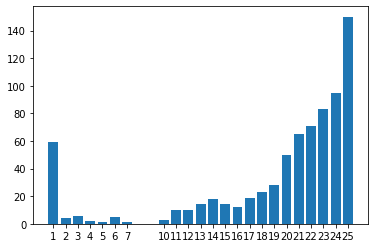

In [12]:
# 코드를 입력해 주세요
# 위의 결과를 시각화 하세요. (먼저 인덱스를 기준으로 데이터를 정렬하세요)
temp_list = train.lotName.value_counts().value_counts().sort_index()
plt.figure(figsize=(6,4))
plt.bar(temp_list.index, temp_list.values)
plt.xticks(temp_list.index)
plt.show()

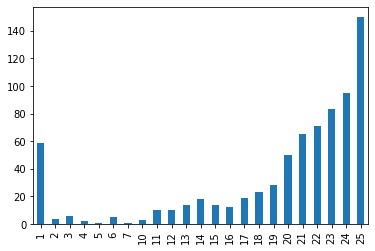

In [13]:
# 코드를 입력해 주세요
# test 데이터 프레임의 lotName별 데이터의 개수를 확인하세요.
test.lotName.value_counts()

lot7660     25
lot12020    25
lot22213    25
lot7609     25
lot12105    25
            ..
lot13108     1
lot194       1
lot42159     1
lot212       1
lot200       1
Name: lotName, Length: 1151, dtype: int64

<p><strong>[출력 결과]</strong></p><pre>lot7578     25
lot12065    25
lot12018    25
lot10619    25
lot12143    25
            ..
lot249       1
lot221       1
lot275       1
lot157       1
lot149       1
Name: lotName, Length: 1151, dtype: int64</pre>

In [14]:
# 코드를 입력해 주세요
# lotName의 개수 결과를 대상으로 한번 더 데이터의 개수를 확인하세요. 
test.lotName.value_counts().value_counts()

25    349
1     127
2     100
24     93
3      71
4      71
5      53
6      34
12     33
13     27
7      26
23     25
8      24
11     20
10     16
22     15
9      13
14     11
20     11
15      8
18      8
19      7
17      4
21      4
16      1
Name: lotName, dtype: int64

<p><strong>[출력 결과]</strong></p><pre>25    349
1     127
2     100
24     93
3      71
4      71
5      53
6      34
12     33
13     27
7      26
23     25
8      24
11     20
10     16
22     15
9      13
14     11
20     11
15      8
18      8
19      7
17      4
21      4
16      1
Name: lotName, dtype: int64</pre>

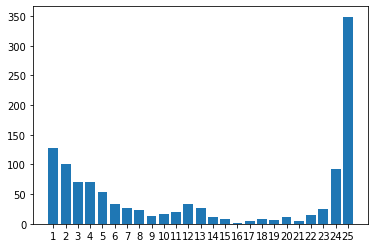

In [15]:
# 코드를 입력해 주세요
# 위의 결과를 시각화 하세요. (먼저 인덱스를 기준으로 데이터를 정렬하세요)
temp_list = test.lotName.value_counts().value_counts().sort_index()
plt.figure(figsize=(6,4))
plt.bar(temp_list.index, temp_list.values)
plt.xticks(temp_list.index)
plt.show()

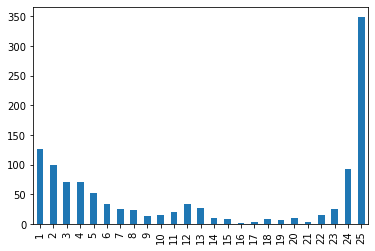

In [16]:
# 코드를 입력해 주세요
# train 데이터 프레임의 waferId별 데이터의 개수를 확인하세요.
train.waferId.value_counts()

2     589
3     589
10    582
18    582
4     581
8     579
1     579
16    578
14    577
25    577
23    575
22    575
19    575
15    574
13    574
17    574
24    572
11    570
5     570
6     570
12    569
7     569
9     564
20    562
21    560
Name: waferId, dtype: int64

<p><strong>[출력 결과]</strong></p><pre>2     589
3     589
10    582
18    582
4     581
8     579
1     579
16    578
14    577
25    577
23    575
22    575
19    575
15    574
13    574
17    574
24    572
11    570
5     570
6     570
12    569
7     569
9     564
20    562
21    560
Name: waferId, dtype: int64</pre>

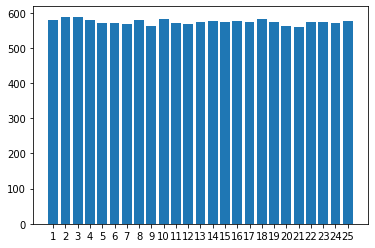

In [17]:
# 코드를 입력해 주세요
# 위의 결과를 시각화 하세요. (먼저 인덱스를 기준으로 데이터를 정렬하세요)
temp_list = train.waferId.value_counts().sort_index()
plt.figure(figsize=(6,4))
plt.bar(temp_list.index, temp_list.values)
plt.xticks(temp_list.index)
plt.show()

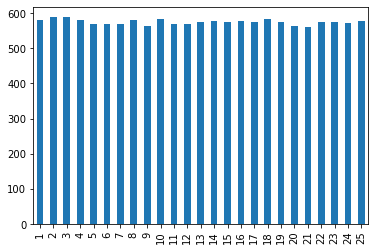

In [18]:
# 코드를 입력해 주세요
# test 데이터 프레임의 waferId별 데이터의 개수를 확인하세요.
test.waferId.value_counts()

1     730
2     682
5     678
6     673
4     671
7     668
9     665
3     665
12    658
11    658
8     655
10    647
13    635
15    614
14    611
17    607
16    607
20    606
21    600
19    595
18    595
22    580
23    571
24    553
25    488
Name: waferId, dtype: int64

<p><strong>[출력 결과]</strong></p><pre>1     730
2     682
5     678
6     673
4     671
7     668
9     665
3     665
12    658
11    658
8     655
10    647
13    635
15    614
14    611
17    607
16    607
20    606
21    600
19    595
18    595
22    580
23    571
24    553
25    488
Name: waferId, dtype: int64</pre>

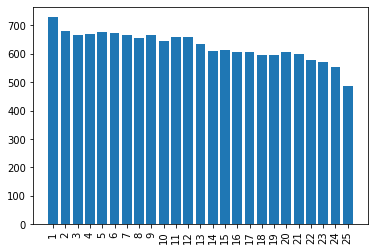

In [40]:
# 코드를 입력해 주세요
# 위의 결과를 시각화 하세요. (먼저 인덱스를 기준으로 데이터를 정렬하세요)
temp_list = test.waferId.value_counts().sort_index()
plt.figure(figsize=(6,4))
plt.bar(temp_list.index, temp_list.values)
plt.xticks(temp_list.index, rotation=90)
plt.show()

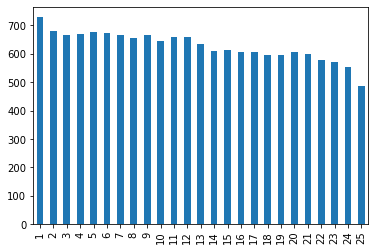

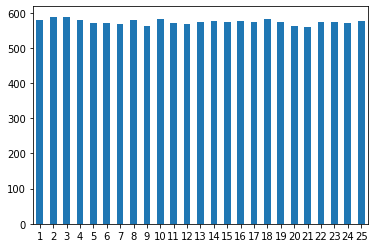

In [41]:
train['waferId'].value_counts().sort_index().plot(kind = 'bar', rot = 0)

In [20]:
# 코드를 입력해 주세요
# train 데이터의 label 컬럼의 개수를 계산하세요
train.label.value_counts()

8    13489
4      297
2      296
0       90
6       74
7       72
3       31
5       16
1        1
Name: label, dtype: int64

<p><strong>[출력 결과]</strong></p><pre>8    13489
4      297
2      296
0       90
6       74
7       72
3       31
5       16
1        1
Name: label, dtype: int64</pre>

In [21]:
# 코드를 입력해주세요
# 아래의 정보를 참고하여 label_name 컬럼을 생성하세요.
# (0 -> Center), (1 -> Donut), (2 -> Edge-Loc), (3 -> Edge-Ring), (4 -> Loc), (5 -> Near-full),(6 -> Random), (7 -> Scratch), (8 -> none)
def rename(x):
    data = {
        0: 'Center', 1: 'Donut', 2: 'Edge-Loc',
        3: 'Edge-Ring', 4: 'Loc', 5: 'Near-full',
        6: 'Random', 7: 'Scratch', 8: 'none'
    } 
    return data[x]
train['label_name'] = train['label'].apply(rename)
train['label_name']

0        none
1        none
2        none
3        none
4        none
         ... 
14361    none
14362    none
14363    none
14364    none
14365    none
Name: label_name, Length: 14366, dtype: object

In [48]:
train['label'].values

array([8, 8, 8, ..., 8, 8, 8])

In [46]:
#함수이름 없이 하는 법
nameList = [ 'Center', 'Donut', 'Edge-Loc', 'Edge-Ring', 'Loc', 'Near-full', 'Random', 'Scratch', 'none']
nameArr = np.array(nameList)
train['label_name'] = nameArr[train['label']]
train['label_name']

0        none
1        none
2        none
3        none
4        none
         ... 
14361    none
14362    none
14363    none
14364    none
14365    none
Name: label_name, Length: 14366, dtype: object

In [22]:
# 코드를 입력해 주세요
# train 데이터의 label_name 컬럼의 개수를 계산하세요
train.label_name.value_counts()

none         13489
Loc            297
Edge-Loc       296
Center          90
Random          74
Scratch         72
Edge-Ring       31
Near-full       16
Donut            1
Name: label_name, dtype: int64

<p><strong>[출력 결과]</strong></p><pre>none         13489
Loc            297
Edge-Loc       296
Center          90
Random          74
Scratch         72
Edge-Ring       31
Near-full       16
Donut            1
Name: label_name, dtype: int64</pre>

In [ ]:
"""
불균형 데이터 - 좀 더 데이터 수집, 1, 3, 5 -> sample 부족
"""

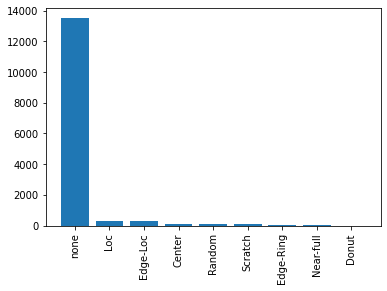

In [23]:
# 코드를 입력해 주세요
# 위의 결과를 시각화 하세요. 
temp_list = train.label_name.value_counts()
plt.figure(figsize=(6,4))
plt.bar(temp_list.index, temp_list.values)
plt.xticks(temp_list.index, rotation=90)
plt.show()

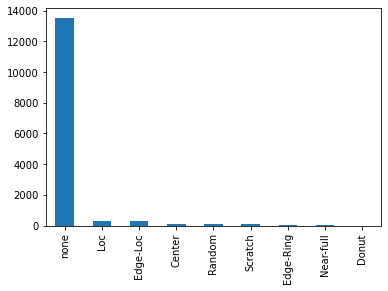

In [24]:
# 코드를 입력해 주세요
# train 데이터 프레임에 컬럼명에 pixel 이라는 문자열이 있는 컬럼명만 선택하여 X에 저장하세요.
X = train.iloc[:, 3:-2]
X = train.iloc[:, 3:679]
X = train.filter(like='pixel')
X = train.filter(regex='^pixel')
X = train[[col for col in train.columns if 'pixel' in col]] # indexer : label name의 list

,pixel_1,pixel_2,pixel_3,pixel_4,pixel_5,pixel_6,pixel_7,pixel_8,pixel_9,pixel_10,pixel_11,pixel_12,pixel_13,pixel_14,pixel_15,pixel_16,pixel_17,pixel_18,pixel_19,pixel_20,pixel_21,pixel_22,pixel_23,pixel_24,pixel_25,pixel_26,pixel_27,pixel_28,pixel_29,pixel_30,pixel_31,pixel_32,pixel_33,pixel_34,pixel_35,pixel_36,pixel_37,pixel_38,pixel_39,pixel_40,...,pixel_637,pixel_638,pixel_639,pixel_640,pixel_641,pixel_642,pixel_643,pixel_644,pixel_645,pixel_646,pixel_647,pixel_648,pixel_649,pixel_650,pixel_651,pixel_652,pixel_653,pixel_654,pixel_655,pixel_656,pixel_657,pixel_658,pixel_659,pixel_660,pixel_661,pixel_662,pixel_663,pixel_664,pixel_665,pixel_666,pixel_667,pixel_668,pixel_669,pixel_670,pixel_671,pixel_672,pixel_673,pixel_674,pixel_675,pixel_676
0,0,0,0,0,0,0,0,0,0,0,2,2,1,1,2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,2,2,1,2,1,...,1,1,1,2,1,2,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,2,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,2,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,2,1,1,1,1,...,1,1,1,2,1,2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,1,2,1,1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,1,2,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,1,1,1,1,1,1,...,1,1,1,1,1,2,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,2,2,2,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,1,2,2,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,2,1,1,...,1,2,2,1,1,1,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,1,2,1,2,1,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,2,2,2,2,2,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,2,...,1,1,2,1,1,1,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,1,2,1,1,2,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14361,0,0,0,0,0,0,0,0,0,0,2,1,1,1,1,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,...,1,2,1,2,1,1,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,1,1,1,1,2,0,0,0,0,0,0,0,0,0,0
14362,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,...,1,1,1,1,1,1,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,2,1,0,0,0,0,0,0,0,0,0,0
14363,0,0,0,0,0,0,0,0,0,0,2,2,2,1,1,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,1,2,1,1,1,2,...,1,1,1,1,1,2,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,2,2,0,0,0,0,0,0,0,0,0,0
14364,0,0,0,0,0,0,0,0,0,0,2,2,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,1,1,1,1,1,1,...,1,1,1,1,1,1,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,2,2,1,1,0,0,0,0,0,0,0,0,0,0


In [49]:
train.columns.str.startswith('pixel')

array([False, False, False,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,

<p><strong>[출력 결과]</strong></p><div>
<style scoped>
    .dataframe tbody tr th:only-of-type {
        vertical-align: middle;
    }

    .dataframe tbody tr th {
        vertical-align: top;
    }

    .dataframe thead th {
        text-align: right;
    }
</style>
<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>pixel_1</th>
      <th>pixel_2</th>
      <th>pixel_3</th>
      <th>pixel_4</th>
      <th>pixel_5</th>
      <th>pixel_6</th>
      <th>pixel_7</th>
      <th>pixel_8</th>
      <th>pixel_9</th>
      <th>pixel_10</th>
      <th>...</th>
      <th>pixel_667</th>
      <th>pixel_668</th>
      <th>pixel_669</th>
      <th>pixel_670</th>
      <th>pixel_671</th>
      <th>pixel_672</th>
      <th>pixel_673</th>
      <th>pixel_674</th>
      <th>pixel_675</th>
      <th>pixel_676</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>0</th>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>...</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
    </tr>
    <tr>
      <th>1</th>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>...</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
    </tr>
    <tr>
      <th>2</th>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>...</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
    </tr>
    <tr>
      <th>3</th>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>...</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
    </tr>
    <tr>
      <th>4</th>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>...</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
    </tr>
    <tr>
      <th>...</th>
      <td>...</td>
      <td>...</td>
      <td>...</td>
      <td>...</td>
      <td>...</td>
      <td>...</td>
      <td>...</td>
      <td>...</td>
      <td>...</td>
      <td>...</td>
      <td>...</td>
      <td>...</td>
      <td>...</td>
      <td>...</td>
      <td>...</td>
      <td>...</td>
      <td>...</td>
      <td>...</td>
      <td>...</td>
      <td>...</td>
      <td>...</td>
    </tr>
    <tr>
      <th>14361</th>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>...</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
    </tr>
    <tr>
      <th>14362</th>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>...</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
    </tr>
    <tr>
      <th>14363</th>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>...</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
    </tr>
    <tr>
      <th>14364</th>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>...</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
    </tr>
    <tr>
      <th>14365</th>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>...</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
    </tr>
  </tbody>
</table>
<p>14366 rows × 676 columns</p>
</div>

In [56]:
# 코드를 입력해 주세요.
# X 데이터를 Numpy Array로 변경하여 (14366, 26, 26) 으로 shape을 변경하세요. (images변수에 저장하세요.)
images = X.values.reshape(-1, 26, 26)
#images = X.to_numpy().reshape(14366, 26, 26)
#images = np.array(X).reshape(14366, 26, 26)
# 26개 칼럼을 가진게 26개 있고, 그 2차원 형태가 14366개 있다.
images.shape

(14366, 26, 26)

<p><strong>[출력 결과]</strong></p><pre>(14366, 26, 26)</pre>

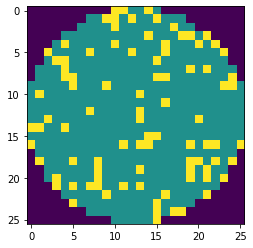

In [61]:
# 코드를 입력해 주세요.
# images 변수의 첫번째 데이터를 선택하여 시각화 하세요 (plt.imshow 함수 이용)
plt.imshow(images[0])
#plt.axis('off') 축 보기 싫을 때
plt.show()

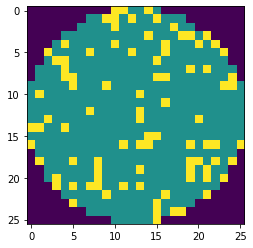

In [59]:
# 각 레이블별 데이터 1개씩 추출
info = [[label, train[train['label_name'] == label].index[0]] for label in train['label_name'].unique()]
info

[['none', 0],
 ['Edge-Ring', 27],
 ['Edge-Loc', 99],
 ['Scratch', 392],
 ['Random', 395],
 ['Center', 397],
 ['Loc', 432],
 ['Near-full', 668],
 ['Donut', 10686]]

In [53]:
a = enumerate(info, start=1)
next(a)

(1, ['none', 0])

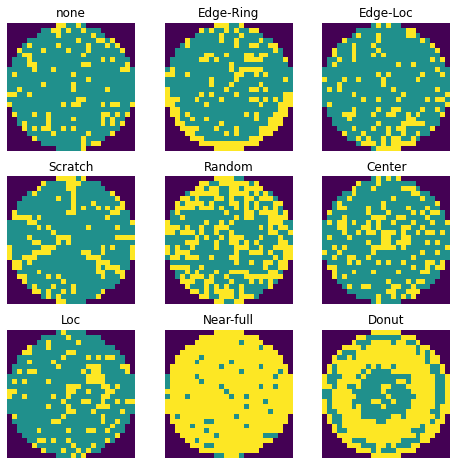

In [28]:
# 코드를 입력해 주세요.
# 위의 info 변수를 이용하여 각 레이블별 웨이퍼맵을 시각화 하세요.
plt.figure(figsize=(8, 8))
for cnt, (name, index) in enumerate(info):
    plt.subplot(3, 3, cnt+1)
    plt.imshow(images[index])
    plt.title(name)
    plt.axis('off')
# for cnt, (name, index) in enumerate(info, start=1):
#     plt.subplot(3, 3, cnt)
#     plt.imshow(images[index])
#     plt.title(name)
#     plt.axis('off')
plt.show()

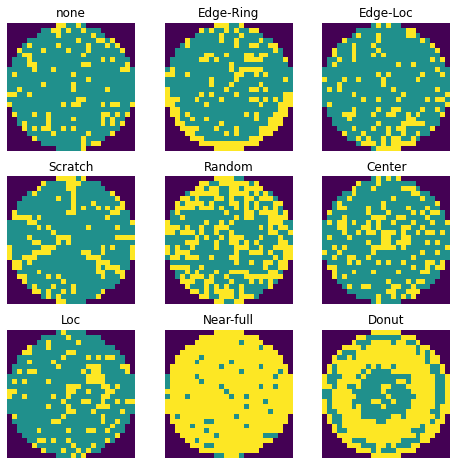

In [64]:
plt.figure(figsize=(8, 8))
for x in range(0,9):
    plt.subplot(3, 3, x+1)
    plt.imshow(images[info[x][1]])
    plt.title(info[x][0])
    plt.axis('off')
plt.show()

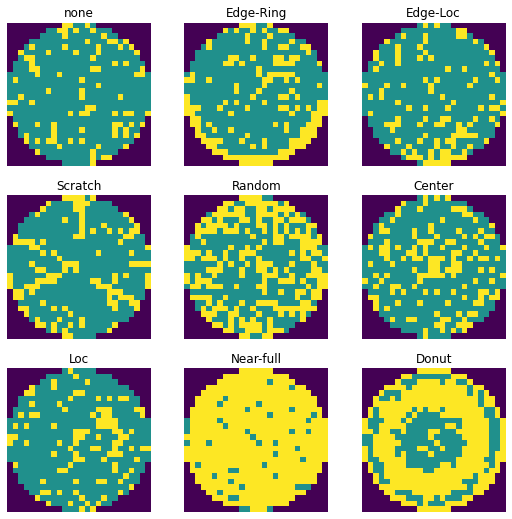

In [29]:
# 코드를 입력해 주세요
# label 컬럼을 Y에 저장하세요.
Y = train['label']
Y

0        8
1        8
2        8
3        8
4        8
        ..
14361    8
14362    8
14363    8
14364    8
14365    8
Name: label, Length: 14366, dtype: int64

<p><strong>[출력 결과]</strong></p><pre>0        8
1        8
2        8
3        8
4        8
        ..
14361    8
14362    8
14363    8
14364    8
14365    8
Name: label, Length: 14366, dtype: int64</pre>

In [30]:
# 코드를 입력해 주세요
# 분리된 X와 Y를 Train과 Test로 분할하세요.
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, random_state=1)#, strarify=Y 은 안됨. 이유는 Donut이 1개이기 때문

In [66]:
[x.shape for x in [x_train, x_test, y_train, y_test]]

[(10774, 676), (3592, 676), (10774,), (3592,)]

In [31]:
# 코드를 입력해 주세요
# KNN 알고리즘을 이용하여 모델링하고 성능을 출력하세요. (K는 9로 지정하세요.)
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=9).fit(x_train, y_train)
model.score(x_train, y_train), model.score(x_test, y_test)

(0.9452385372192315, 0.9482182628062361)

<p><strong>[출력 결과]</strong></p><pre>(0.946723593837015, 0.9457126948775055)</pre>

In [32]:
import shelve
with shelve.open('abc') as data:
    data['model'] = model

In [34]:
# 코드를 입력해 주세요
# test 데이터 프레임에 컬럼명에 pixel 이라는 문자열이 있는 컬럼명만 선택하여 X2에 저장하세요.
X2 = test.iloc[:, 3:]
X2

,pixel_1,pixel_2,pixel_3,pixel_4,pixel_5,pixel_6,pixel_7,pixel_8,pixel_9,pixel_10,pixel_11,pixel_12,pixel_13,pixel_14,pixel_15,pixel_16,pixel_17,pixel_18,pixel_19,pixel_20,pixel_21,pixel_22,pixel_23,pixel_24,pixel_25,pixel_26,pixel_27,pixel_28,pixel_29,pixel_30,pixel_31,pixel_32,pixel_33,pixel_34,pixel_35,pixel_36,pixel_37,pixel_38,pixel_39,pixel_40,...,pixel_637,pixel_638,pixel_639,pixel_640,pixel_641,pixel_642,pixel_643,pixel_644,pixel_645,pixel_646,pixel_647,pixel_648,pixel_649,pixel_650,pixel_651,pixel_652,pixel_653,pixel_654,pixel_655,pixel_656,pixel_657,pixel_658,pixel_659,pixel_660,pixel_661,pixel_662,pixel_663,pixel_664,pixel_665,pixel_666,pixel_667,pixel_668,pixel_669,pixel_670,pixel_671,pixel_672,pixel_673,pixel_674,pixel_675,pixel_676
0,0,0,0,0,0,0,0,0,0,0,1,2,2,1,2,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,2,2,1,1,1,...,1,1,2,1,1,1,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2,2,1,2,2,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,2,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,1,1,1,1,1,...,1,1,1,1,1,1,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,1,2,2,2,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,2,2,1,2,1,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,1,1,1,1,1,1,...,1,1,1,1,1,2,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,2,2,1,1,1,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,1,1,1,1,1,2,...,2,1,2,1,2,2,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,1,1,2,1,1,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,2,2,2,1,1,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,1,1,1,1,1,...,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,1,1,2,2,2,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15707,0,0,0,0,0,0,0,0,0,0,1,2,1,1,1,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,1,1,2,2,1,1,...,1,1,1,1,1,2,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,1,1,1,1,2,0,0,0,0,0,0,0,0,0,0
15708,0,0,0,0,0,0,0,0,0,0,1,2,1,2,2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,...,2,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2,1,1,2,2,0,0,0,0,0,0,0,0,0,0
15709,0,0,0,0,0,0,0,0,0,0,1,1,2,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,1,1,1,2,1,1,...,2,1,2,1,1,1,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,1,1,2,1,2,0,0,0,0,0,0,0,0,0,0
15710,0,0,0,0,0,0,0,0,0,0,1,2,1,1,2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,1,1,1,1,1,2,...,1,1,2,1,1,2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2,1,2,2,1,0,0,0,0,0,0,0,0,0,0


<p><strong>[출력 결과]</strong></p><div>
<style scoped>
    .dataframe tbody tr th:only-of-type {
        vertical-align: middle;
    }

    .dataframe tbody tr th {
        vertical-align: top;
    }

    .dataframe thead th {
        text-align: right;
    }
</style>
<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>pixel_1</th>
      <th>pixel_2</th>
      <th>pixel_3</th>
      <th>pixel_4</th>
      <th>pixel_5</th>
      <th>pixel_6</th>
      <th>pixel_7</th>
      <th>pixel_8</th>
      <th>pixel_9</th>
      <th>pixel_10</th>
      <th>...</th>
      <th>pixel_667</th>
      <th>pixel_668</th>
      <th>pixel_669</th>
      <th>pixel_670</th>
      <th>pixel_671</th>
      <th>pixel_672</th>
      <th>pixel_673</th>
      <th>pixel_674</th>
      <th>pixel_675</th>
      <th>pixel_676</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>0</th>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>...</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
    </tr>
    <tr>
      <th>1</th>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>...</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
    </tr>
    <tr>
      <th>2</th>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>...</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
    </tr>
    <tr>
      <th>3</th>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>...</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
    </tr>
    <tr>
      <th>4</th>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>...</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
    </tr>
    <tr>
      <th>...</th>
      <td>...</td>
      <td>...</td>
      <td>...</td>
      <td>...</td>
      <td>...</td>
      <td>...</td>
      <td>...</td>
      <td>...</td>
      <td>...</td>
      <td>...</td>
      <td>...</td>
      <td>...</td>
      <td>...</td>
      <td>...</td>
      <td>...</td>
      <td>...</td>
      <td>...</td>
      <td>...</td>
      <td>...</td>
      <td>...</td>
      <td>...</td>
    </tr>
    <tr>
      <th>15707</th>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>...</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
    </tr>
    <tr>
      <th>15708</th>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>...</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
    </tr>
    <tr>
      <th>15709</th>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>...</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
    </tr>
    <tr>
      <th>15710</th>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>...</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
    </tr>
    <tr>
      <th>15711</th>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>...</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
      <td>0</td>
    </tr>
  </tbody>
</table>
<p>15712 rows × 676 columns</p>
</div>

In [35]:
# 코드를 입력해 주세요
# X2 데이터 프레임을 예측하여 submission 데이터 프레임의 label 컬럼에 추가하세요.
submission['label'] = model.predict(X2)# test.csv를 예측한 결과 대입
submission

,lotName,label
0,lot7,8
1,lot7,8
2,lot7,8
3,lot7,8
4,lot7,8
...,...,...
15707,lot42180,8
15708,lot42180,8
15709,lot42180,8
15710,lot42180,8


<p><strong>[출력 결과]</strong></p><div>
<style scoped>
    .dataframe tbody tr th:only-of-type {
        vertical-align: middle;
    }

    .dataframe tbody tr th {
        vertical-align: top;
    }

    .dataframe thead th {
        text-align: right;
    }
</style>
<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>lotName</th>
      <th>label</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>0</th>
      <td>lot7</td>
      <td>8</td>
    </tr>
    <tr>
      <th>1</th>
      <td>lot7</td>
      <td>8</td>
    </tr>
    <tr>
      <th>2</th>
      <td>lot7</td>
      <td>8</td>
    </tr>
    <tr>
      <th>3</th>
      <td>lot7</td>
      <td>8</td>
    </tr>
    <tr>
      <th>4</th>
      <td>lot7</td>
      <td>8</td>
    </tr>
    <tr>
      <th>...</th>
      <td>...</td>
      <td>...</td>
    </tr>
    <tr>
      <th>15707</th>
      <td>lot42180</td>
      <td>8</td>
    </tr>
    <tr>
      <th>15708</th>
      <td>lot42180</td>
      <td>8</td>
    </tr>
    <tr>
      <th>15709</th>
      <td>lot42180</td>
      <td>8</td>
    </tr>
    <tr>
      <th>15710</th>
      <td>lot42180</td>
      <td>8</td>
    </tr>
    <tr>
      <th>15711</th>
      <td>lot42180</td>
      <td>8</td>
    </tr>
  </tbody>
</table>
<p>15712 rows × 2 columns</p>
</div>

In [36]:
import shelve
with shelve.open('abc') as data:
    data['submission'] = submission

# 순서대로 평가가 진행됩니다. 실행은 1회만 해주세요.

- 느리다고 중지 후 다시 평가 코드를 실행하는 경우 제출 과정에서 패널티가 발생할 수 있습니다. (제출 횟수 이슈 발생 가능)

In [39]:
myPro.submit(submission) # 제출 파일 생성 및 결과 제출

파일을 저장하였습니다. 파일명: submission-00-21-01.csv
제출 여부 :success
오늘 제출 횟수 : 1
제출 결과:0.8899264937610801


In [ ]:
"""
#저장하기
import shelve
with shelve.open('abc') as data:
    data['submission'] = submission
#저장하기
import shelve
with shelve.open('abc') as data:
   print(list(data.keys()))
   model = data['model']
"""

# 축하드립니다. 모델의 성능을 개선하여 더 좋은 점수를 획득해보세요!